# Descriptor de LBP (Local Binary Patterns)

En este notebook, se implementará el descriptor Local Binary Patterns (LBP) para analizar imágenes y extraer características relevantes. Este descriptor es útil para tareas de clasificación y reconocimiento de patrones en imágenes.

## Importar librerías necesarias

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import random

## Variables de entorno

In [5]:
carpeta_preprocesadas = 'data/preprocesadas/'
train_normal = carpeta_preprocesadas + 'train/NORMAL/'
train_pneumonia = carpeta_preprocesadas + 'train/PNEUMONIA/'
test_normal = carpeta_preprocesadas + 'test/NORMAL/'
test_pneumonia = carpeta_preprocesadas + 'test/PNEUMONIA/'
val_normal = carpeta_preprocesadas + 'val/NORMAL/'
val_pneumonia = carpeta_preprocesadas + 'val/PNEUMONIA/'
dir_train = carpeta_preprocesadas + 'train/'
dir_test = carpeta_preprocesadas + 'test/'
dir_val = carpeta_preprocesadas + 'val/'
salida_caracteristicas = 'data/caracteristicas/'

## Muestra aleatoria de las imágenes preprocesadas

Se tomará aleatoriamente 3 imágenes por clase del conjunto de entrenamiento.

In [6]:
# Seleccionar 3 imágenes al azar de cada categoría
normal_images = os.listdir(train_normal)
neumonia_images = os.listdir(train_pneumonia)
random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)

## Cargar y mostrar imágenes aleatoriamente seleccionadas

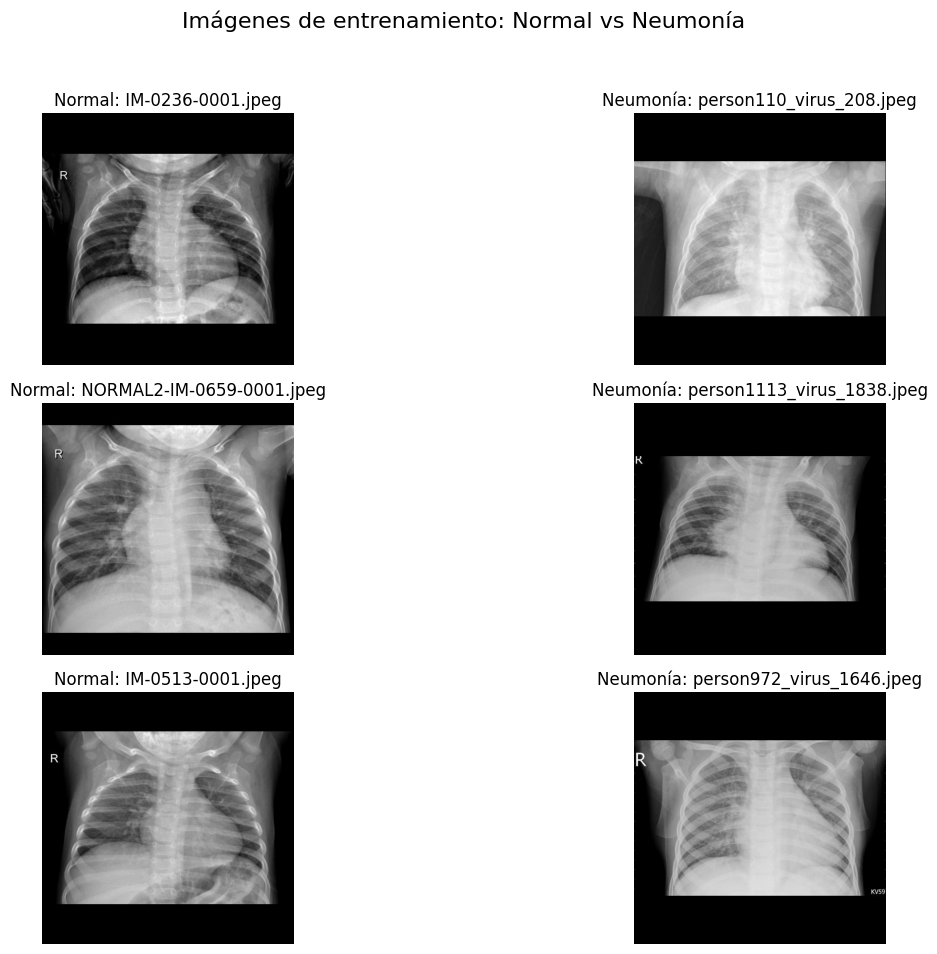

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
images = []
for i in range(3):
    # Imagen normal
    img_normal = plt.imread(os.path.join(train_normal, random_normal_images[i]))
    images.append(img_normal)
    axes[i, 0].imshow(img_normal, cmap='gray')
    axes[i, 0].set_title(f'Normal: {random_normal_images[i]}')
    axes[i, 0].axis('off')

    # Imagen con neumonía
    img_neumonia = plt.imread(os.path.join(train_pneumonia, random_neumonia_images[i]))
    images.append(img_neumonia)
    axes[i, 1].imshow(img_neumonia, cmap='gray')
    axes[i, 1].set_title(f'Neumonía: {random_neumonia_images[i]}')
    axes[i, 1].axis('off')

plt.suptitle('Imágenes de entrenamiento: Normal vs Neumonía', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Calcular y visualizar el descriptor LBP

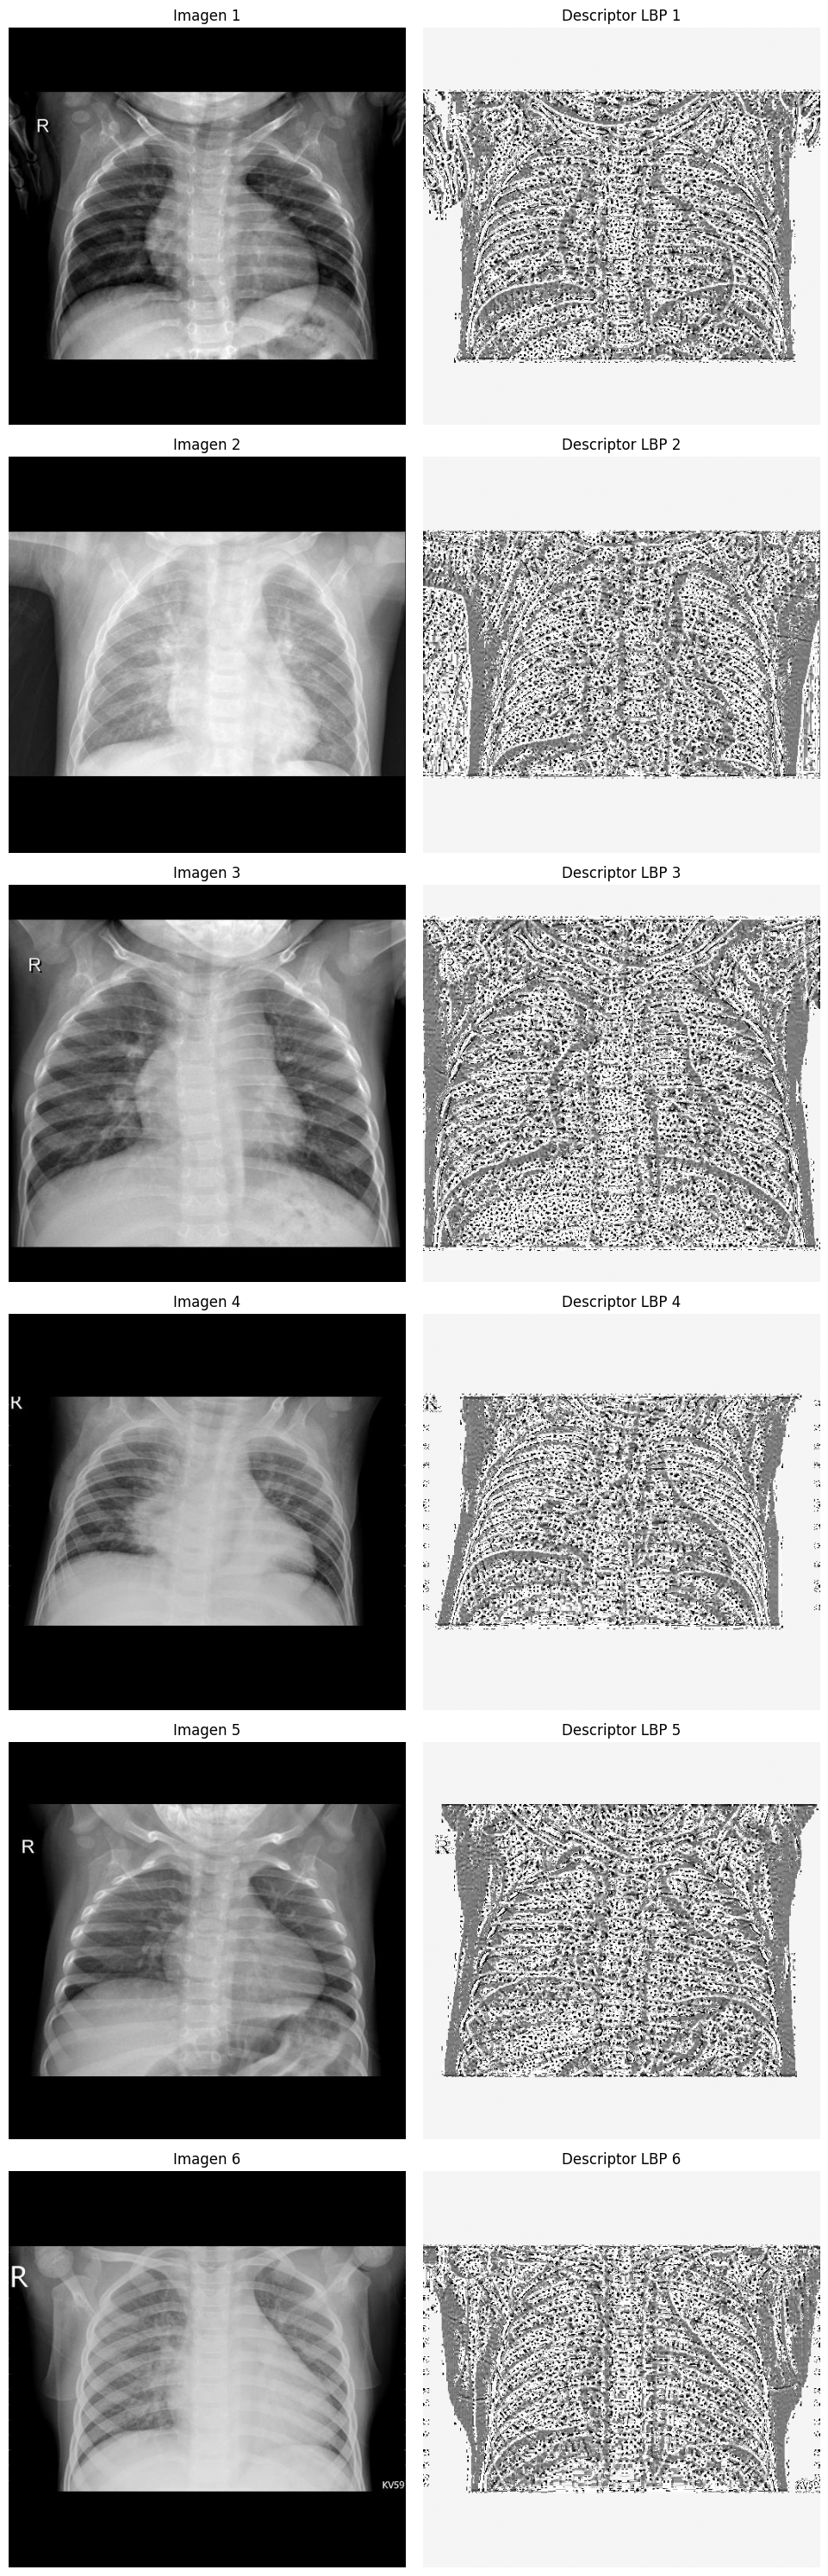

In [8]:
# Parámetros para LBP
radius = 3  # Radio del vecindario
n_points = 8 * radius  # Número de puntos en el vecindario

# Crear la figura con 2 columnas (una para la imagen y otra para el descriptor)
num_images = len(images)
fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

for i, imagen in enumerate(images):
    # Convertir la imagen a escala de grises si no lo está
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Mostrar la imagen original
    axes[i, 0].imshow(imagen, cmap='gray')
    axes[i, 0].set_title(f'Imagen {i + 1}')
    axes[i, 0].axis('off')

    # Calcular el descriptor LBP
    lbp = local_binary_pattern(imagen, n_points, radius, method='uniform')

    # Mostrar el descriptor LBP
    axes[i, 1].imshow(lbp, cmap='gray')
    axes[i, 1].set_title(f'Descriptor LBP {i + 1}')
    axes[i, 1].axis('off')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

## Bibliografía

- https://aihalapathirana.medium.com/understanding-the-local-binary-pattern-lbp-a-powerful-method-for-texture-analysis-in-computer-4fb55b3ed8b8